In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('medical_cost_insurance.csv')

In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
#getting top 10 rows
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [7]:
#getting bottom 10 rows
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#Above observed that no null values are presebt in the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
#Observed that there are 2 columns of float dtype
#2 columns of int datatype
#2 columns of object(string values)data type

In [12]:
for i in df:
    print(df[i].value_counts())

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64
male      676
female    662
Name: sex, dtype: int64
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
       

In [13]:
#checking duplicacy in data
duplicate=df.duplicated()
print(duplicate.sum())

1


In [14]:
#dropping d_uplicated row as only 1 row is present
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(1337, 7)

In [16]:
#seperating numeric columns and categoric columns
num=[]
cat=[]
for i in df.columns:
    if df.dtypes[i]=='object':
        cat.append(i)
    else:
        num.append(i)

In [17]:
cat

['sex', 'smoker', 'region']

In [18]:
num

['age', 'bmi', 'children', 'charges']

In [19]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [20]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [21]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [22]:
#from above observation
#age has no of unique values 47 out of 1337
#while charges has No unique values as the data is continous in target variable,hence it is the Regression problem

In [23]:
df['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [24]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [25]:
#data is normally skewed
#few outliers are present in age and bmi column

In [26]:
#Encoding Datai.e categorical columns encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat:
    df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


EDA--GRaphical Analysis

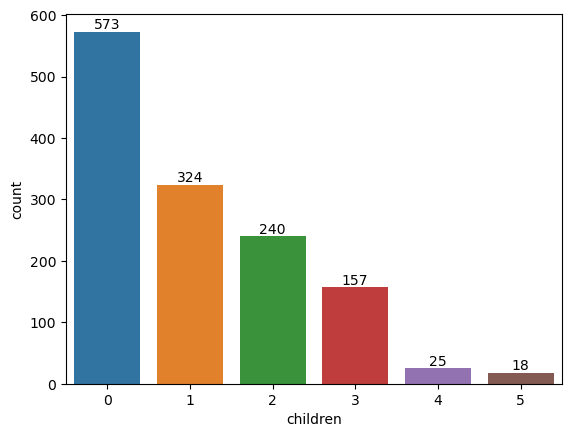

In [27]:
ax=sns.countplot(x='children',data=df)
for c in ax.containers:
    plt.bar_label(c)

In [28]:
#We observe that there are no children in large numbers ,more no of children is very less for insurance

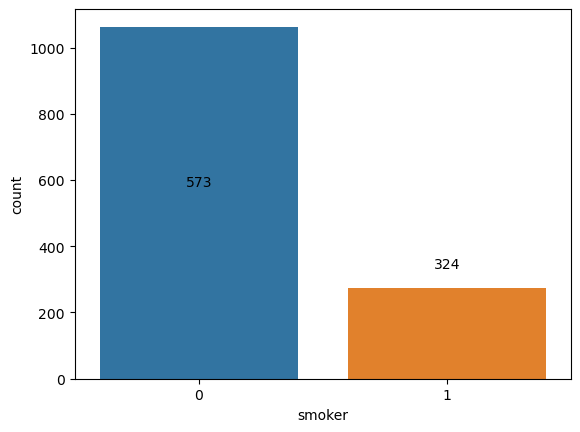

In [29]:
sns.countplot(x='smoker',data=df)
for c in ax.containers:
    plt.bar_label(c)


In [30]:
#there are more no of smokers 'No' who have applied for insurance

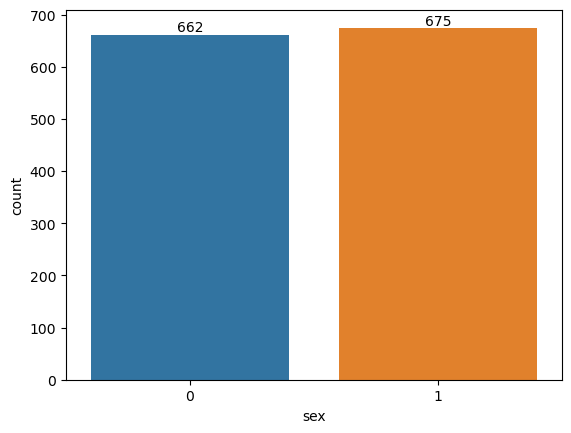

In [31]:
ax=sns.countplot(data=df,x='sex')
for c in ax.containers:
    plt.bar_label(c)

In [32]:
#almost equal no of male and feamles have applied for medical insurance

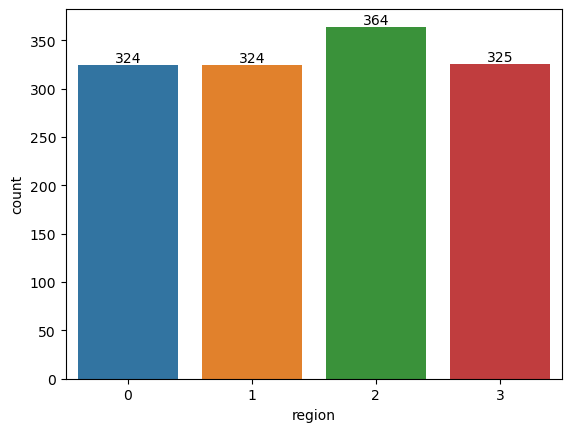

In [33]:

ax=sns.countplot(x='region',data=df)
for c in ax.containers:
    plt.bar_label(c)

In [34]:
##southeast region have applied more for insuarnce
#while other regions have equally applied ofr insurance

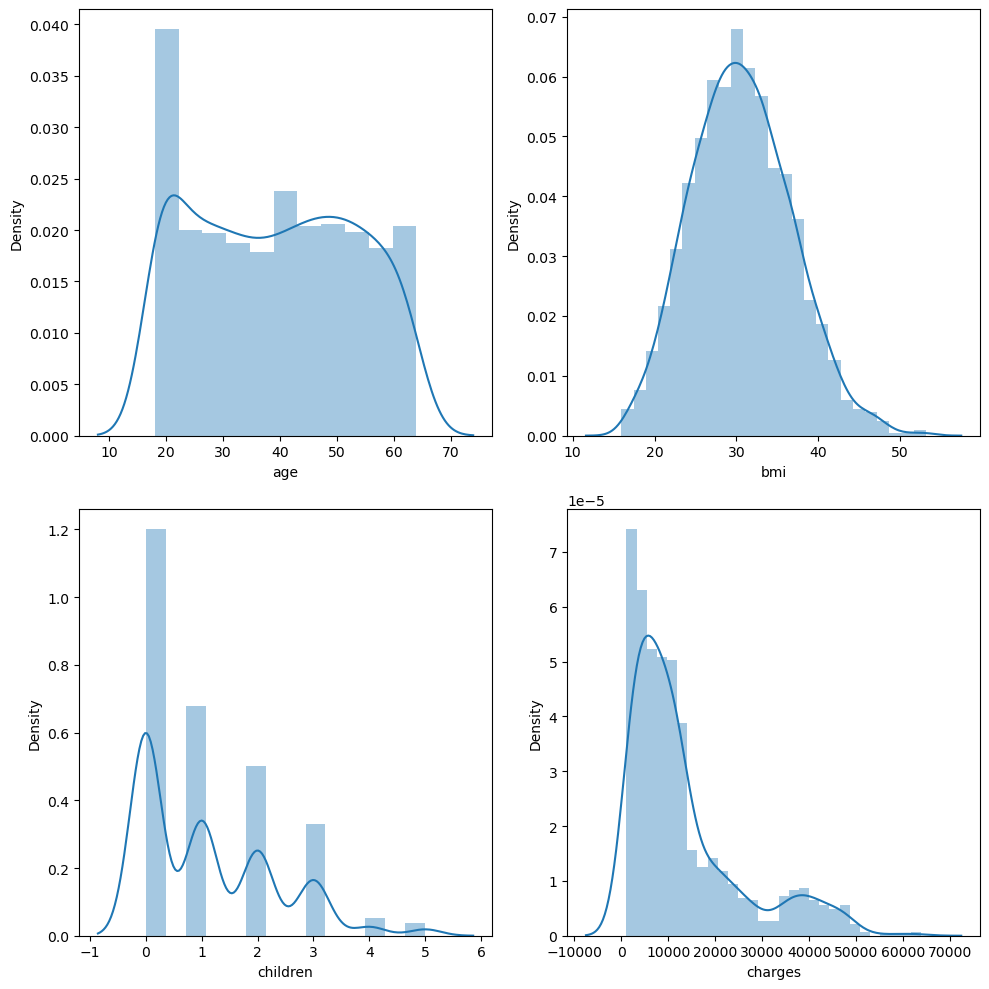

In [35]:
#distribution plot
plt.figure(figsize=(10,10))
p=1
for i in num:
    if p<=4:
        plt.subplot(2,2,p)
        sns.distplot(df[i])
    p+=1
plt.tight_layout()

In [36]:
#we observe that data in charges which is target variable has right skewed data
#other columns bmi,children have normal distribution

In [37]:
#BIvariate Analysis

In [38]:
print(cat)
print(num)

['sex', 'smoker', 'region']
['age', 'bmi', 'children', 'charges']


<Axes: xlabel='sex', ylabel='charges'>

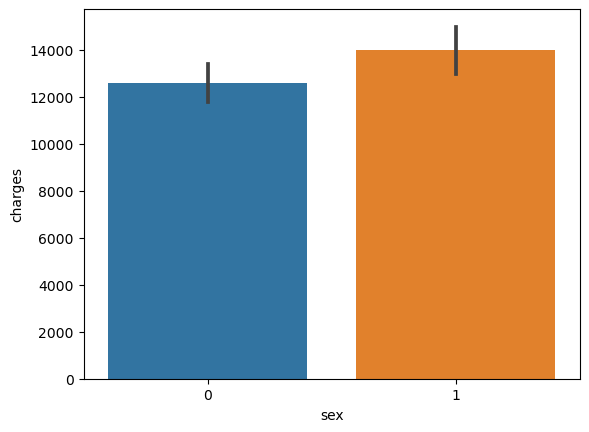

In [39]:
sns.barplot(x='sex',y='charges',data=df)

In [40]:
#male has high ratio paying for more insurance charges

<Axes: xlabel='smoker', ylabel='charges'>

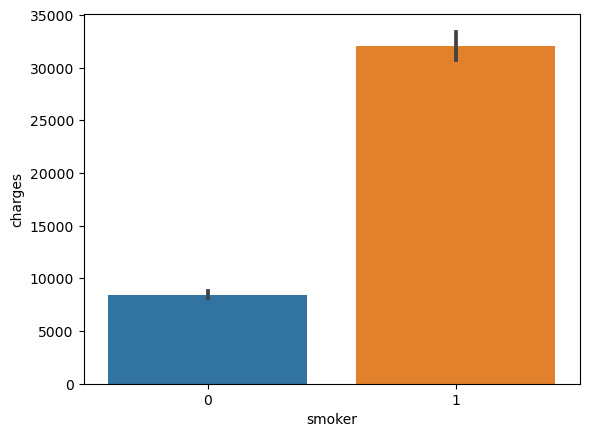

In [41]:
sns.barplot(x='smoker',y='charges',data=df)

In [42]:
#people who are smokers have high insurance charges
#while Non smokers have less insurance charges

<Axes: xlabel='region', ylabel='charges'>

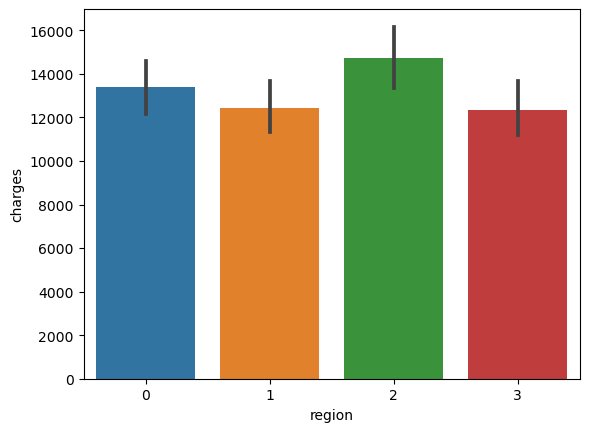

In [43]:
sns.barplot(x='region',y='charges',data=df)

In [44]:
#southeast region shows that thay have paid high charges for insurance
#while other regions shows that almost equal charges of insurance paid by them

<Axes: xlabel='children', ylabel='age'>

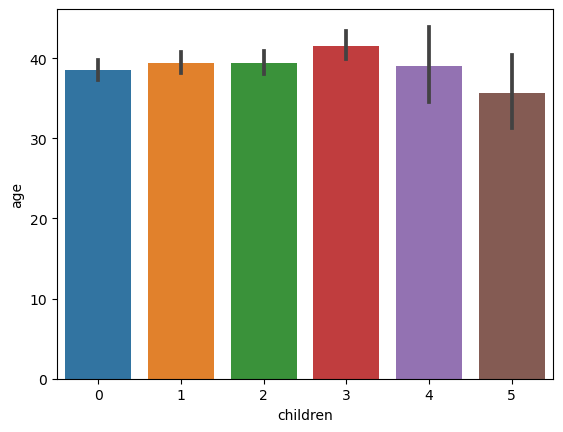

In [45]:
sns.barplot(x='children',y='age',data=df)

In [46]:
#we observe that children with more age spend more on insurance charges

<Axes: xlabel='region', ylabel='charges'>

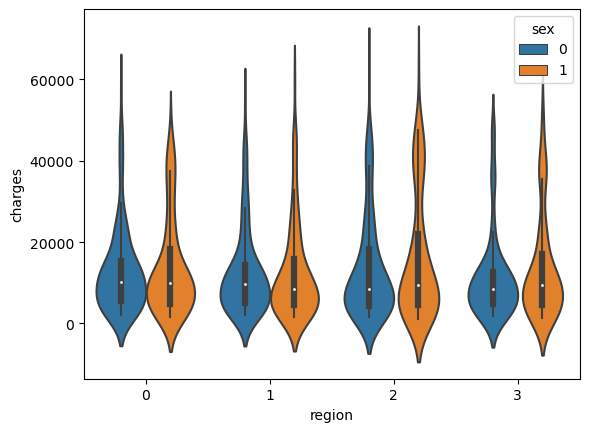

In [47]:
sns.violinplot(x='region',y='charges',data=df,hue='sex')

In [48]:
#southeast region have equal female and male people paying for insurance charges
#while in northeast region the ration of female is more than male paying for insurance charges

<Axes: xlabel='children', ylabel='charges'>

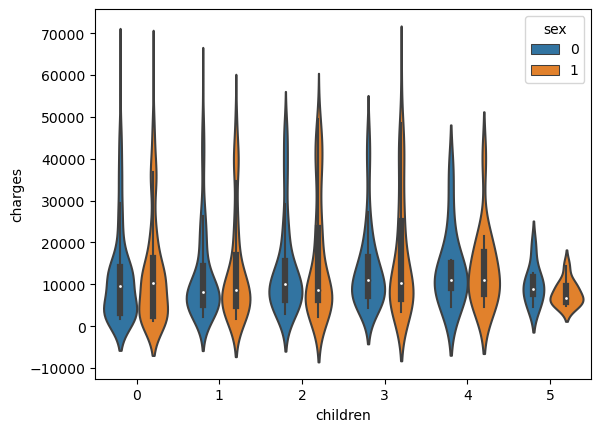

In [49]:
sns.violinplot(x='children',y='charges',data=df,hue='sex')

In [50]:
#people with no children are paying  higher charges
#people with 2,3,4 and 5 children are paying less insurance charges


<Axes: xlabel='sex', ylabel='charges'>

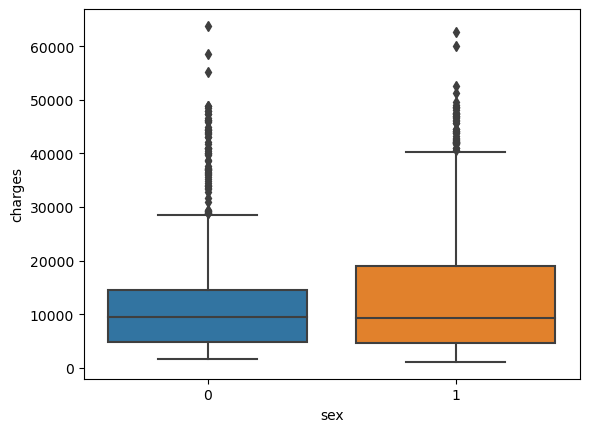

In [51]:
sns.boxplot(x='sex',y='charges',data=df)

In [52]:
#outliers are present in data

<Axes: xlabel='children', ylabel='charges'>

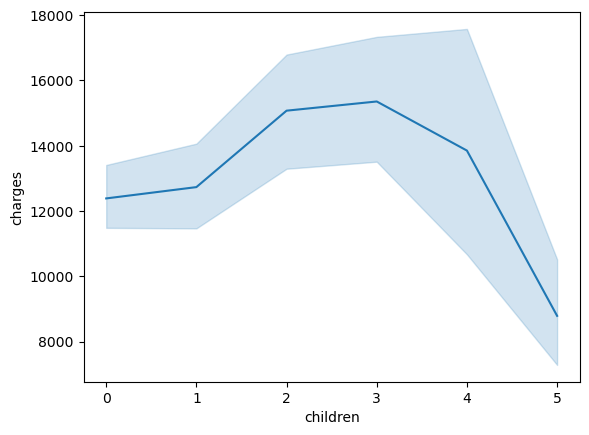

In [53]:
sns.lineplot(x='children',y='charges',data=df)

In [54]:
#people with 2 and 3 childrens have paid high amount for insurance

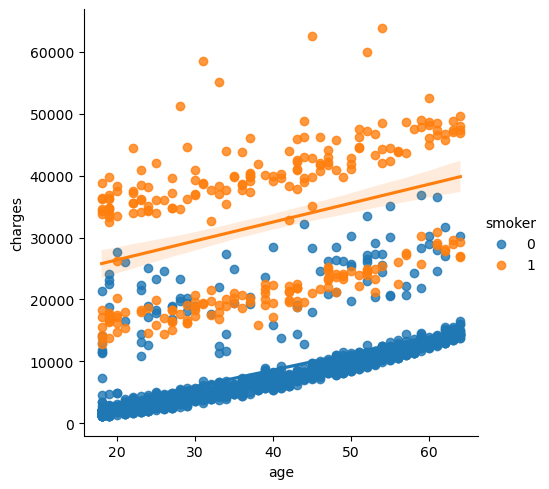

In [55]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df)

In [56]:
#observe that Non smoker pay more for insuarnce chrges
#while increased no of smokers pay more than smokers for insurance charges


In [57]:
#Multivariate Analysis

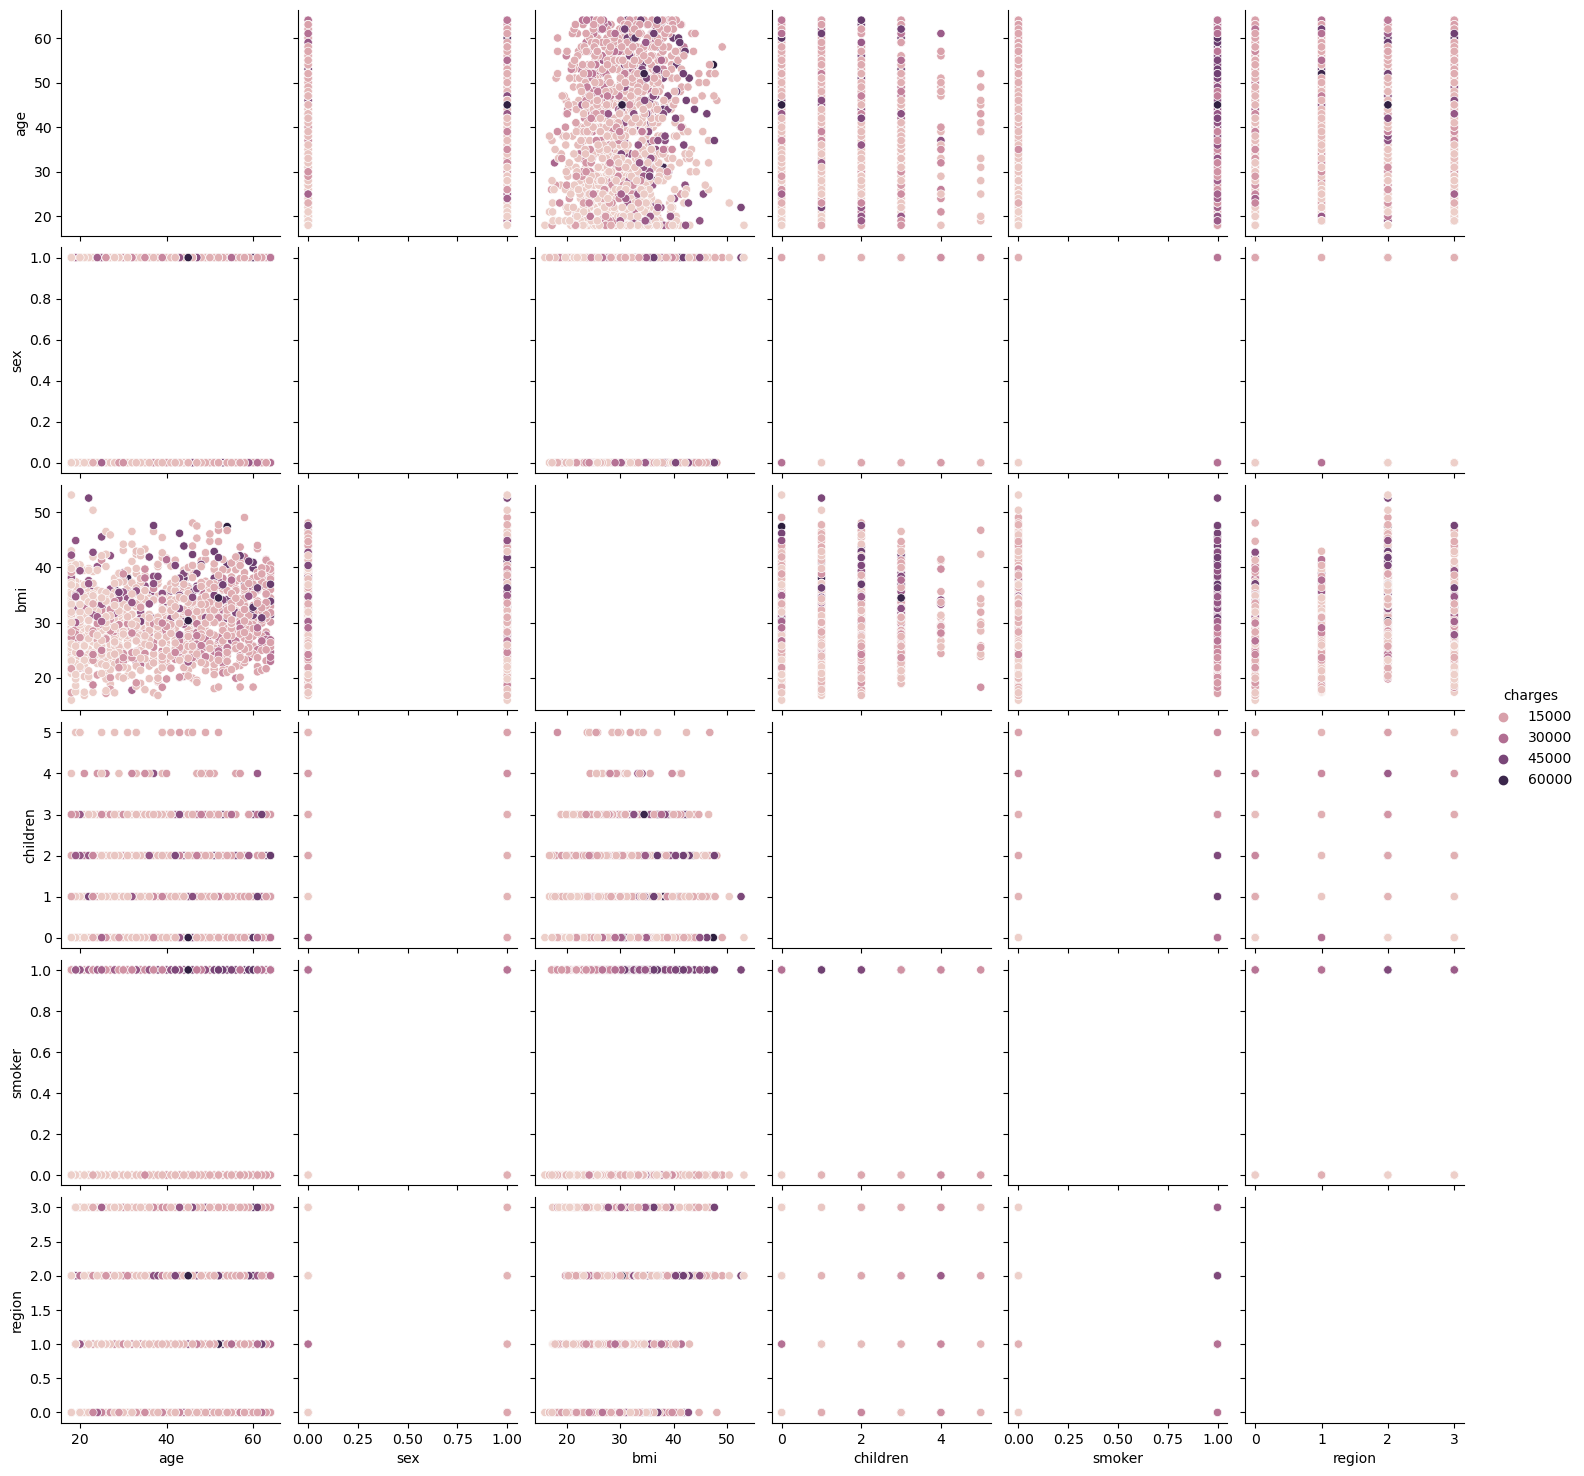

In [58]:
sns.pairplot(df,hue='charges')

In [59]:
#checking skewness

In [60]:
df.skew()

age         0.054781
sex        -0.019469
bmi         0.283914
children    0.937421
smoker      1.463601
region     -0.039068
charges     1.515391
dtype: float64

<Axes: xlabel='charges', ylabel='Density'>

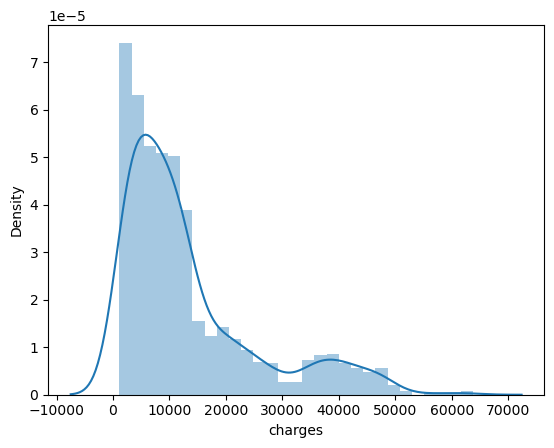

In [61]:
sns.distplot(df['charges'])

In [62]:
#dta in taget is skwed towrds right
#removing sjewness using squarerrottransformation

In [63]:
df['charges']=np.sqrt(df['charges'])

In [64]:
df.skew()

age         0.054781
sex        -0.019469
bmi         0.283914
children    0.937421
smoker      1.463601
region     -0.039068
charges     0.795995
dtype: float64

<Axes: xlabel='smoker', ylabel='Density'>

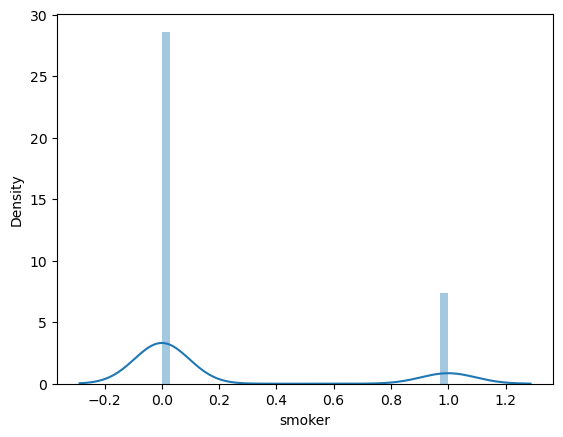

In [65]:
sns.distplot(df['smoker'])

In [66]:
#as smoker has categorical data no need to remove skewness

In [67]:
#correlation
cor=df.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.409672
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.037950
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.167888
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.106222
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.756065
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.023931
charges,0.409672,0.037950,0.167888,0.106222,0.756065,-0.023931,1.000000


<Axes: >

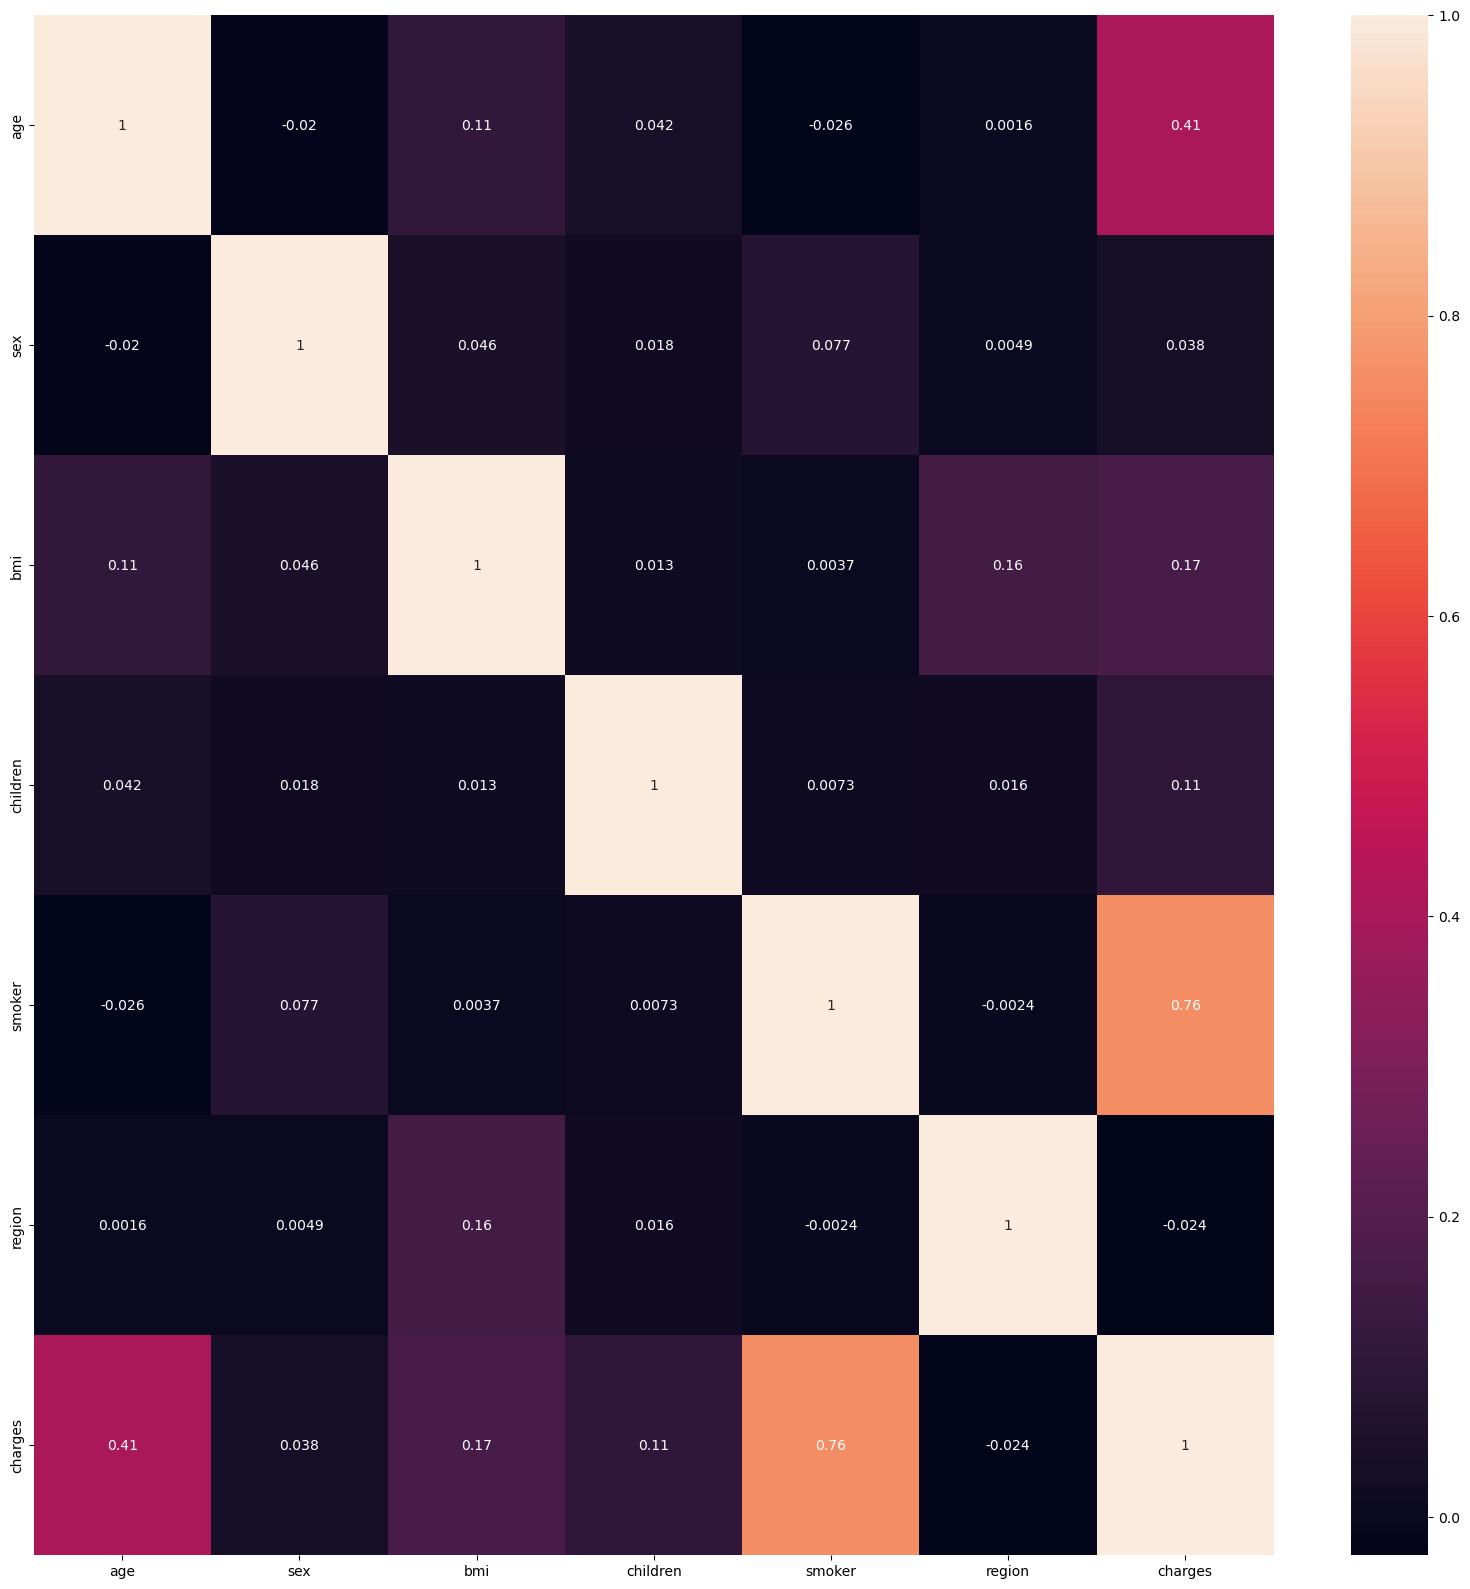

In [68]:
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True)

In [69]:
#we observe that 
#chrges is positively correlated with everu faeture except with region it is negativly correlated

In [71]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [73]:
#Applying min amx scaler
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x=pd.DataFrame(mms.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,0.021739,0.0,0.321227,0.0,1.0,1.000000
1,0.000000,1.0,0.479150,0.2,0.0,0.666667
2,0.217391,1.0,0.458434,0.6,0.0,0.666667
3,0.326087,1.0,0.181464,0.0,0.0,0.333333
4,0.304348,1.0,0.347592,0.0,0.0,0.333333
...,...,...,...,...,...,...
1332,0.695652,1.0,0.403820,0.6,0.0,0.333333
1333,0.000000,0.0,0.429379,0.0,0.0,0.000000
1334,0.000000,0.0,0.562012,0.0,0.0,0.666667
1335,0.065217,0.0,0.264730,0.0,0.0,1.000000


In [ ]:
##checking for Multicollinearity in dS using VIF values

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vi
vif=pd.DataFrame()
vif['columns']=x.columns
vif['Vif values']=[vi(x.values,i) for i in range(len(x.columns))]

In [75]:
vif

,columns,Vif values
0,age,2.851843
1,sex,1.895829
2,bmi,4.509600
3,children,1.727935
4,smoker,1.241988
5,region,2.683848


In [84]:
#Dropping bmi column as it is highly collinear with other columns

In [76]:
df.drop('bmi',axis=1,inplace=True)

In [77]:
df.shape

(1337, 6)

In [80]:
x=df.drop('charges',axis=1)

In [81]:
x.columns

Index(['age', 'sex', 'children', 'smoker', 'region'], dtype='object')

In [82]:
#checking vif again
from statsmodels.stats.outliers_influence import variance_inflation_factor as vi
vif=pd.DataFrame()
vif['columns']=x.columns
vif['Vif values']=[vi(x.values,i) for i in range(len(x.columns))]


In [83]:
vif

,columns,Vif values
0,age,3.381797
1,sex,1.870586
2,children,1.749673
3,smoker,1.241084
4,region,2.466223


In [85]:
y.value_counts()


129.942002    1
46.014550     1
47.133475     1
140.705560    1
114.297345    1
             ..
85.703466     1
161.583814    1
168.190064    1
33.902742     1
170.708407    1
Name: charges, Length: 1337, dtype: int64

In [86]:
#As we observe that target variable holds continous data ,also no of unique valuess rae more
#it is a Regression Problem

Machine Learning Model

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor

In [139]:
#fing random state at which we get maximum accuracy
lr=LinearRegression()
maxacc=0
maxrs=0
for i in range(201):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    ypred=lr.predict(x_test)
    acc=r2_score(y_test,ypred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
        
        
print('Max accuracy is',maxacc,'at random state',i)

Max accuracy is 0.8123838687126703 at random state 200


In [141]:
#creating train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=200)

In [143]:
#building LR model
lr=LinearRegression()
lr.fit(x_train,y_train)
ypred=lr.predict(x_test)
print('Accuarcy score',r2_score(y_test,ypred))
print('absolute Eror',mean_absolute_error(y_test,ypred))

print('Squared Error',mean_squared_error(y_test,ypred))

Accuarcy score 0.7426251867665832
absolute Eror 16.021781649974827
Squared Error 621.4176888441089


In [144]:
#building Lasso model
l=Lasso()
l.fit(x_train,y_train)
ypred=l.predict(x_test)
print('Accuarcy score',r2_score(y_test,ypred))
print('absolute Eror',mean_absolute_error(y_test,ypred))

print('Squared Error',mean_squared_error(y_test,ypred))

Accuarcy score 0.738968372539063
absolute Eror 16.89494602280095
Squared Error 630.2468707568586


In [145]:
#building Ridge model
rd=Ridge()
rd.fit(x_train,y_train)
ypred=rd.predict(x_test)
print('Accuarcy score',r2_score(y_test,ypred))
print('absolute Eror',mean_absolute_error(y_test,ypred))

print('Squared Error',mean_squared_error(y_test,ypred))

Accuarcy score 0.7424674637067353
absolute Eror 16.107825987041053
Squared Error 621.7985027166735


In [146]:
#building SVR model
svr=SVR()
svr.fit(x_train,y_train)
ypred=svr.predict(x_test)
print('Accuarcy score',r2_score(y_test,ypred))
print('absolute Eror',mean_absolute_error(y_test,ypred))

print('Squared Error',mean_squared_error(y_test,ypred))

Accuarcy score -0.07345233259405659
absolute Eror 29.202856512100002
Squared Error 2591.7931099184443


In [159]:
##GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
ypred=gbr.predict(x_test)
print('Accuarcy score',r2_score(y_test,ypred))
print('absolute Eror',mean_absolute_error(y_test,ypred))

print('Squared Error',mean_squared_error(y_test,ypred))


Accuarcy score 0.7529603740442441
absolute Eror 15.641607447047571
Squared Error 596.4639332253316


In [147]:
#building EN model
from sklearn.linear_model import ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)
ypred=en.predict(x_test)
print('Accuarcy score',r2_score(y_test,ypred))
print('absolute Eror',mean_absolute_error(y_test,ypred))

print('Squared Error',mean_squared_error(y_test,ypred))

Accuarcy score 0.3972443904366574
absolute Eror 30.17351933904667
Squared Error 1455.321105927245


In [148]:
#building DTR model
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
ypred=dtr.predict(x_test)
print('Accuarcy score',r2_score(y_test,ypred))
print('absolute Eror',mean_absolute_error(y_test,ypred))

print('Squared Error',mean_squared_error(y_test,ypred))

Accuarcy score 0.5344626722997563
absolute Eror 18.714401298575076
Squared Error 1124.01492055784


In [149]:
##From above we conclude that gradientboostingRegression provides Highest accuracy
#lets check the cross val score for the models before selecting final model

In [150]:
from sklearn.model_selection import cross_val_score

##LR

score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('Difference between r2score and crossvalscore is',(r2_score(y_test,ypred)-score.mean())*100)

[0.78876124 0.69936754 0.80286943 0.75182316 0.75764592]
0.7600934568845573
Difference between r2score and crossvalscore is -22.563078458480103


In [160]:
##GradientBoostingRegressor
score=cross_val_score(gbr,x,y)
print(score)
print(score.mean())
print('Difference between r2score and crossvalscore is',(r2_score(y_test,ypred)-score.mean())*100)


[0.79640049 0.70036286 0.79944642 0.76342751 0.770882  ]
0.7661038559534283
Difference between r2score and crossvalscore is -1.314348190918424


In [151]:
##Lasso

score=cross_val_score(l,x,y)
print(score)
print(score.mean())
print('Difference between r2score and crossvalscore is',(r2_score(y_test,ypred)-score.mean())*100)

[0.78707505 0.70406543 0.79122868 0.75069795 0.75212784]
0.7570389919687395
Difference between r2score and crossvalscore is -22.257631966898316


In [152]:
##Ridge

score=cross_val_score(rd,x,y)
print(score)
print(score.mean())
print('Difference between r2score and crossvalscore is',(r2_score(y_test,ypred)-score.mean())*100)

[0.78875019 0.69988009 0.8023039  0.75214617 0.75732207]
0.7600804830758088
Difference between r2score and crossvalscore is -22.561781077605247


In [153]:
##svr

score=cross_val_score(svr,x,y)
print(score)
print(score.mean())
print('Difference between r2score and crossvalscore is',(r2_score(y_test,ypred)-score.mean())*100)

[-0.0481138   0.0276202   0.0013837  -0.01138677 -0.16799043]
-0.039697418787303
Difference between r2score and crossvalscore is 57.416009108705936


In [154]:
##DTR

score=cross_val_score(dtr,x,y)
print(score)
print(score.mean())
print('Difference between r2score and crossvalscore is',(r2_score(y_test,ypred)-score.mean())*100)

[0.64831846 0.54477483 0.58611221 0.5830157  0.58747566]
0.5899393719159141
Difference between r2score and crossvalscore is -5.547669961615775


In [155]:
##LR

score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('Difference between r2score and crossvalscore is',(r2_score(y_test,ypred)-score.mean())*100)

[0.78876124 0.69936754 0.80286943 0.75182316 0.75764592]
0.7600934568845573
Difference between r2score and crossvalscore is -22.563078458480103


In [156]:
##ElaasticNet

score=cross_val_score(en,x,y)
print(score)
print(score.mean())
print('Difference between r2score and crossvalscore is',(r2_score(y_test,ypred)-score.mean())*100)##LR



[0.43118033 0.44033528 0.42025325 0.43547447 0.36225379]
0.4178994248441317
Difference between r2score and crossvalscore is 11.656324745562463


##From above we  conclude that GRADIENT BOOSTING REGRESSION PERFORMS BEST GIVING BEST ACCURACY SCORE

In [158]:
from sklearn.model_selection import GridSearchCV

In [163]:
parameters={'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }


gcv=GridSearchCV(gbr,parameters,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [165]:
gcv.best_params_

{'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.5}

In [166]:
#Finally building model using best parameters

In [167]:
gbrmodel=GradientBoostingRegressor(learning_rate= 0.03, max_depth= 4, n_estimators=100, subsample= 0.5)

gbrmodel.fit(x_train,y_train)
ypred=gbrmodel.predict(x_test)
print('Accuarcy score',r2_score(y_test,ypred))
print('absolute Eror',mean_absolute_error(y_test,ypred))

print('Squared Error',mean_squared_error(y_test,ypred))


Accuarcy score 0.7546997123942472
absolute Eror 15.940197105695686
Squared Error 592.2643940241256


<Axes: xlabel='charges'>

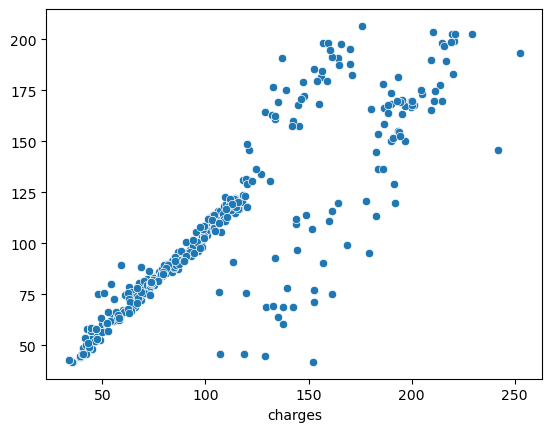

In [170]:
sns.scatterplot(x=y_test,y=ypred)

In [173]:
import joblib
joblib.dump(gbrmodel,'insurance_predict_Gradienboostingregressor.pkl')

['insurance_predict_Gradienboostingregressor.pkl']

In [174]:
model=joblib.load('insurance_predict_Gradienboostingregressor.pkl')
prediction=model.predict(x_test)

In [175]:
prediction

array([ 81.64304981,  74.93856114, 166.29019376, 155.08083608,
        74.80892967,  52.69292488, 199.31230771,  48.90595079,
       166.6195854 ,  83.73465706,  87.64315328, 110.36574277,
        79.6186395 , 114.88370592, 182.58965285,  68.93681071,
       130.78694922, 150.03546032,  91.71407532,  91.30726217,
        82.56666018,  41.89975956,  98.86674275,  99.18277086,
        82.78827393,  96.91148059,  83.32111476, 181.47464748,
       122.41993809, 182.97749326, 116.87883673, 119.65732993,
        75.51355748,  79.64704281,  45.86752899,  95.69215981,
       117.82734324,  48.90595079,  83.05582689, 177.85465775,
       118.31204914, 198.07796079,  78.46394617, 167.82555143,
        96.12698007, 113.12101251, 117.82734324,  80.15904176,
       111.30096265, 198.05236602, 185.44108168,  91.158786  ,
       120.89051285, 177.5249505 , 119.15597891, 196.6121022 ,
       105.47791648,  61.36427771, 167.20923822,  57.84350603,
        78.09864471,  86.00901649, 118.31204914,  63.77

In [177]:
predictiondf=pd.DataFrame()
predictiondf['actual test results']=y_test
predictiondf['predicted test results']=prediction

In [178]:
predictiondf

,actual test results,predicted test results
993,74.057189,81.643050
938,48.000023,74.938561
689,186.564916,166.290194
1186,193.559665,155.080836
1138,60.863409,74.808930
...,...,...
846,99.361466,102.598321
1087,106.551526,109.988975
523,73.468474,81.284370
878,79.260551,84.983436
